In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Cleaned_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,new_price
0,0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,Less_than_40k
1,1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,Around_50k
2,2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,More_than_60k
3,3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,More_than_60k
4,4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,Around_50k


In [4]:
#df = df.drop(columns=[ "device_brand", "os","4g","5g"])

In [5]:
df

,Unnamed: 0,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,new_price
0,0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,Less_than_40k
1,1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,Around_50k
2,2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,More_than_60k
3,3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,More_than_60k
4,4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,Around_50k
...,...,...,...,...,...,...,...,...,...,...,...,...
3311,3322,12.90,8.0,7.0,64.0,4.0,3046.0,188.0,2019,351,5.440164,More_than_60k
3312,3323,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,More_than_60k
3313,3324,15.80,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,Less_than_40k
3314,3325,15.80,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,Less_than_40k


In [6]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=321)

In [7]:
y_train = train_df["new_price"]
X_train = train_df.drop(columns="new_price")
y_test = test_df["new_price"]
X_test = test_df.drop(columns="new_price")

In [8]:
X_train.head()

,Unnamed: 0,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price
978,985,12.70,8.0,2.0,16.0,4.0,2000.0,150.0,2016,1083,3.917011
3140,3150,12.85,12.2,8.0,64.0,4.0,3000.0,147.0,2019,508,4.470610
3312,3323,15.24,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732
3089,3099,12.75,16.0,8.0,32.0,4.0,2705.0,153.0,2016,1075,4.791235
195,200,16.23,12.0,20.0,64.0,4.0,3800.0,189.0,2019,362,4.989003


In [9]:
y_train.head()

978     Less_than_40k
3140       Around_50k
3312    More_than_60k
3089       Around_50k
195        Around_50k
Name: new_price, dtype: object

In [10]:
X_test.head()

,Unnamed: 0,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price
2942,2951,13.79,16.0,8.0,128.0,4.0,3600.0,167.8,2016,618,4.879767
2410,2419,12.70,8.0,5.0,32.0,4.0,2450.0,147.0,2016,835,4.005878
2627,2636,10.16,5.0,0.3,32.0,4.0,1500.0,127.0,2016,843,3.592093
1566,1573,12.83,16.0,8.0,64.0,4.0,3340.0,160.0,2016,686,4.986206
2166,2174,10.16,5.0,0.3,16.0,4.0,2500.0,154.0,2015,1052,3.684118


In [11]:
y_test.head()

2942    More_than_60k
2410    More_than_60k
2627    Less_than_40k
1566    More_than_60k
2166    Less_than_40k
Name: new_price, dtype: object

In [12]:
from sklearn.svm import SVC

In [13]:
svm = SVC()

In [14]:
svm.fit(X_train,y_train)

SVC()

In [15]:
svm_pred= svm.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix 

In [17]:
cm = confusion_matrix(y_test, svm_pred)
cm

array([[335,   3,   8],
       [100,  33,   0],
       [167,   1,  17]], dtype=int64)

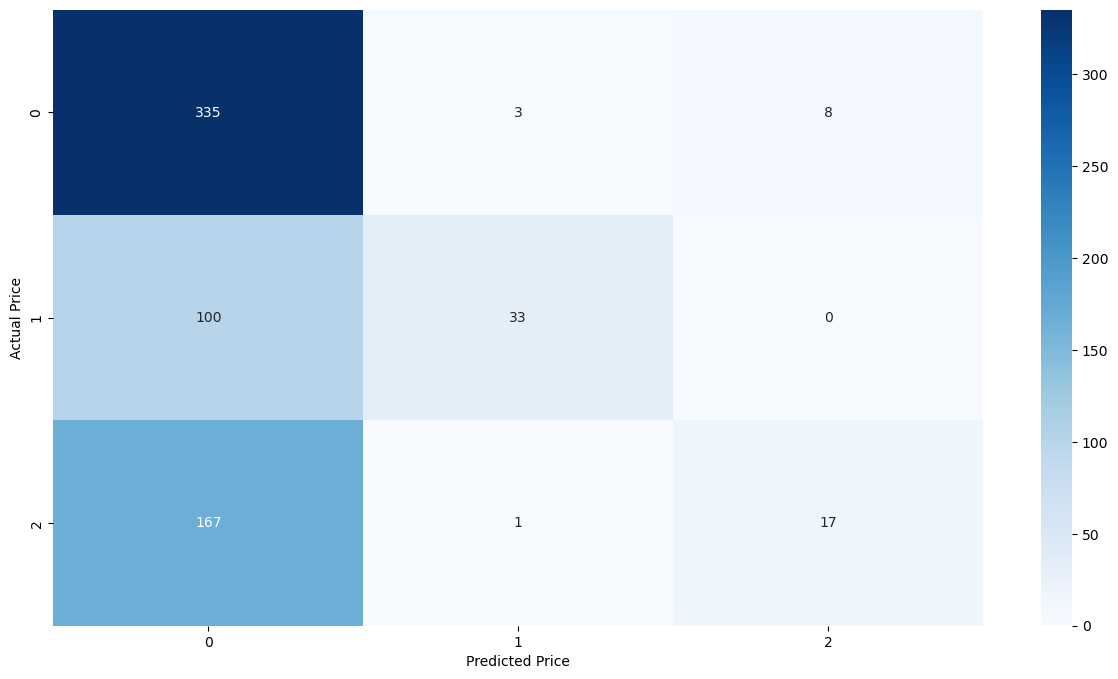

In [18]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test, svm_pred)

0.5798192771084337

In [21]:
#Tuning the C parameters

In [22]:
svm = SVC(kernel = 'rbf', C = 150)

In [23]:
svm.fit(X_train, y_train)

SVC(C=150)

In [24]:
svm_pred_1 = svm.predict(X_test)

In [25]:
cm = confusion_matrix(y_test, svm_pred_1)
cm

array([[315,   4,  27],
       [ 99,  33,   1],
       [116,   1,  68]], dtype=int64)

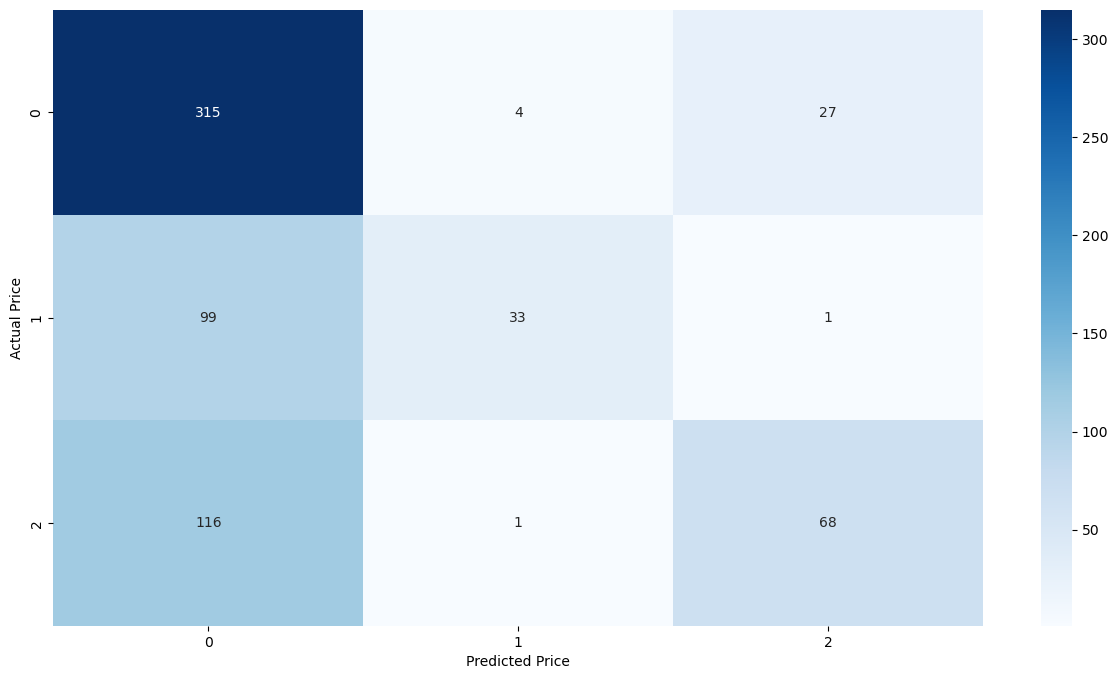

In [26]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [27]:
accuracy_score(y_test, svm_pred_1)

0.6265060240963856

In [28]:
svm = SVC(kernel = 'rbf', C = 200)

In [29]:
svm.fit(X_train,y_train)

SVC(C=200)

In [30]:
svm_pred_2 = svm.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, svm_pred_2)
cm

array([[314,   4,  28],
       [100,  32,   1],
       [115,   1,  69]], dtype=int64)

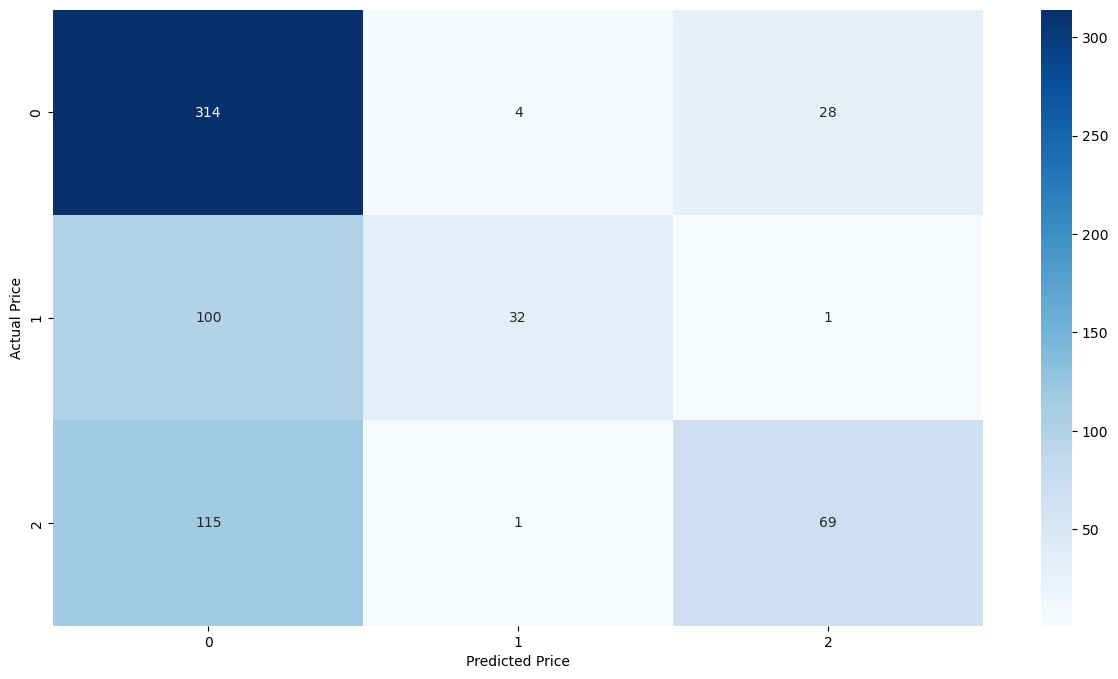

In [32]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [33]:
accuracy_score(y_test, svm_pred_2)

0.625

In [34]:
#Polynomial Kernal

In [35]:
svm_poly = SVC(kernel = 'poly')

In [36]:
svm_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [37]:
svm_poly_pred = svm.predict(X_test)

In [38]:
cm = confusion_matrix(y_test, svm_poly_pred)
cm

array([[314,   4,  28],
       [100,  32,   1],
       [115,   1,  69]], dtype=int64)

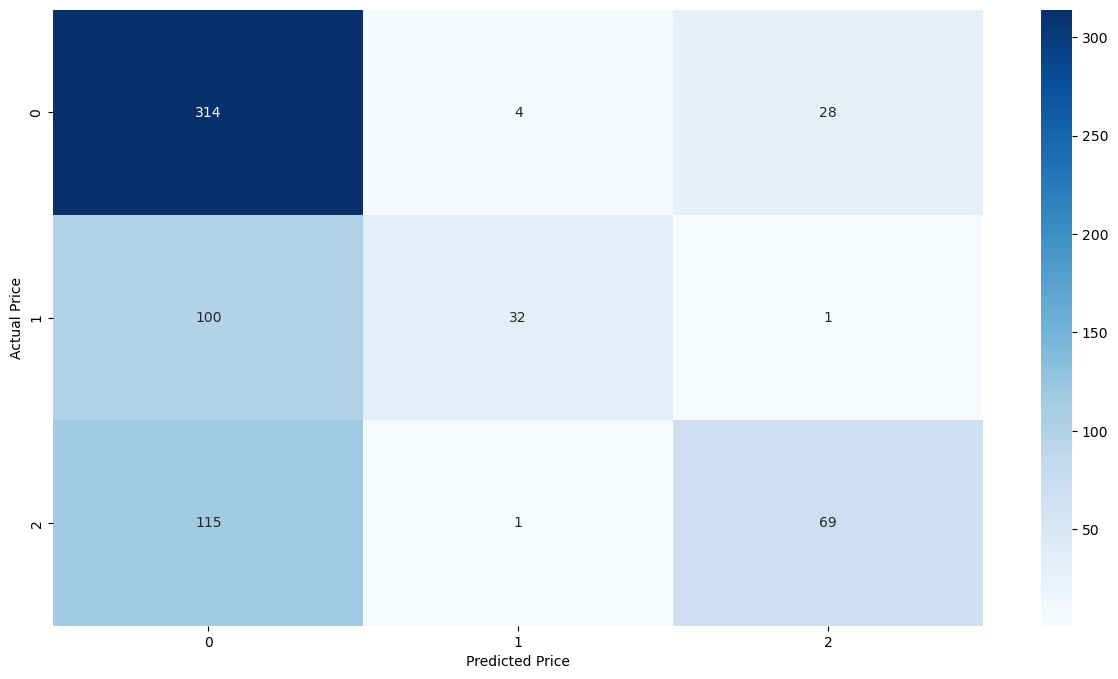

In [39]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [40]:
accuracy_score(y_test, svm_poly_pred)

0.625

In [41]:
svm_poly = SVC(kernel = 'poly', C = 125)

In [42]:
svm_poly.fit(X_train,y_train)

SVC(C=125, kernel='poly')

In [43]:
svm_poly_pred_1 = svm_poly.predict(X_test)

In [44]:
cm = confusion_matrix(y_test, svm_poly_pred_1)
cm

array([[308,   8,  30],
       [ 98,  34,   1],
       [119,   1,  65]], dtype=int64)

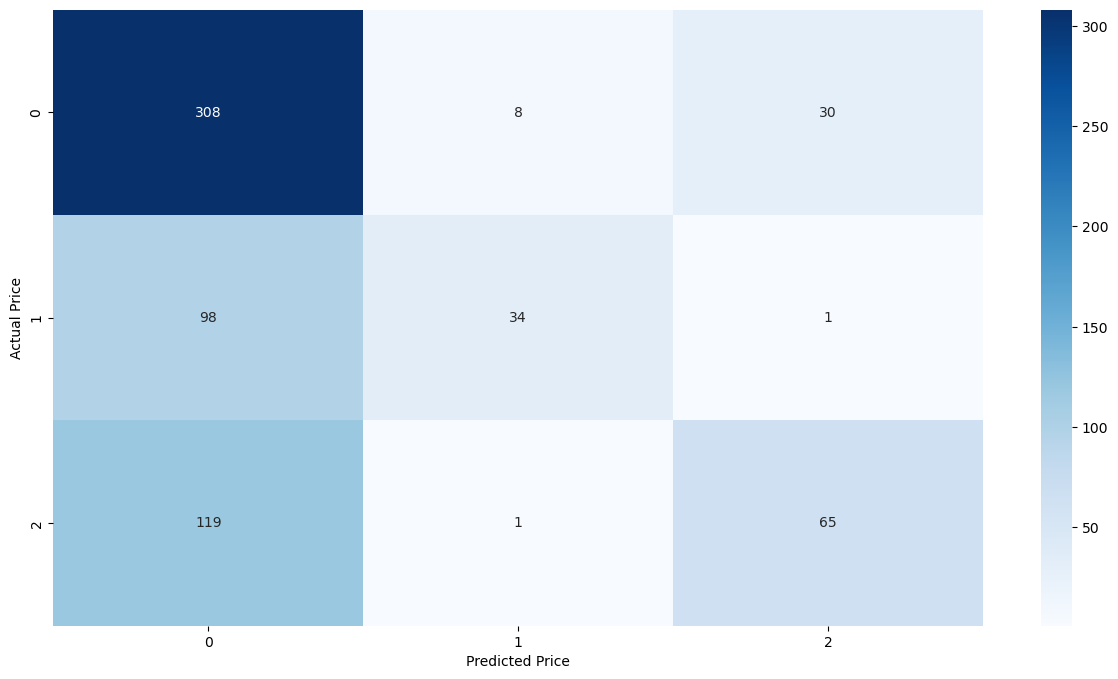

In [45]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [46]:
accuracy_score(y_test, svm_poly_pred_1)

0.6129518072289156

In [47]:
svm_poly = SVC(kernel = 'poly', C = 340)

In [48]:
svm_poly.fit(X_train,y_train)

SVC(C=340, kernel='poly')

In [49]:
svm_poly_pred_2 = svm_poly.predict(X_test)

In [50]:
cm = confusion_matrix(y_test, svm_poly_pred_2)

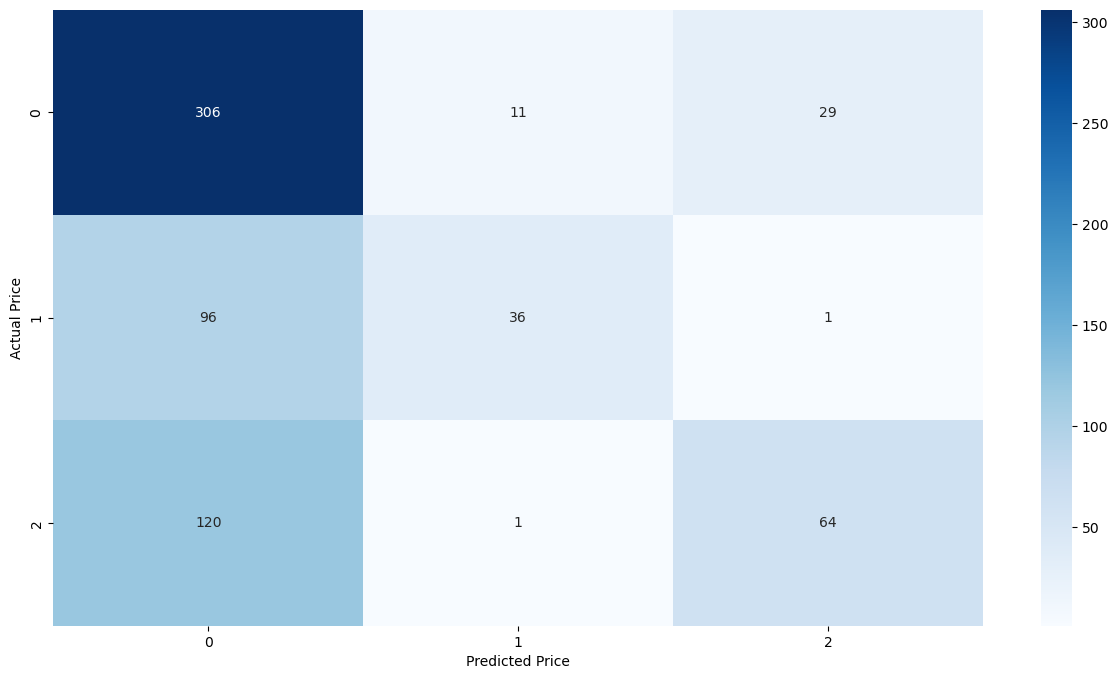

In [51]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [52]:
accuracy_score(y_test, svm_poly_pred_2)

0.6114457831325302

In [53]:
#Linear Kernal

In [54]:
svm_lin = SVC(kernel = "linear")

In [55]:
svm_lin.fit(X_train,y_train)

SVC(kernel='linear')

In [56]:
y_pred_lin = svm_lin.predict(X_test)

In [57]:
cm = confusion_matrix(y_test, y_pred_lin)

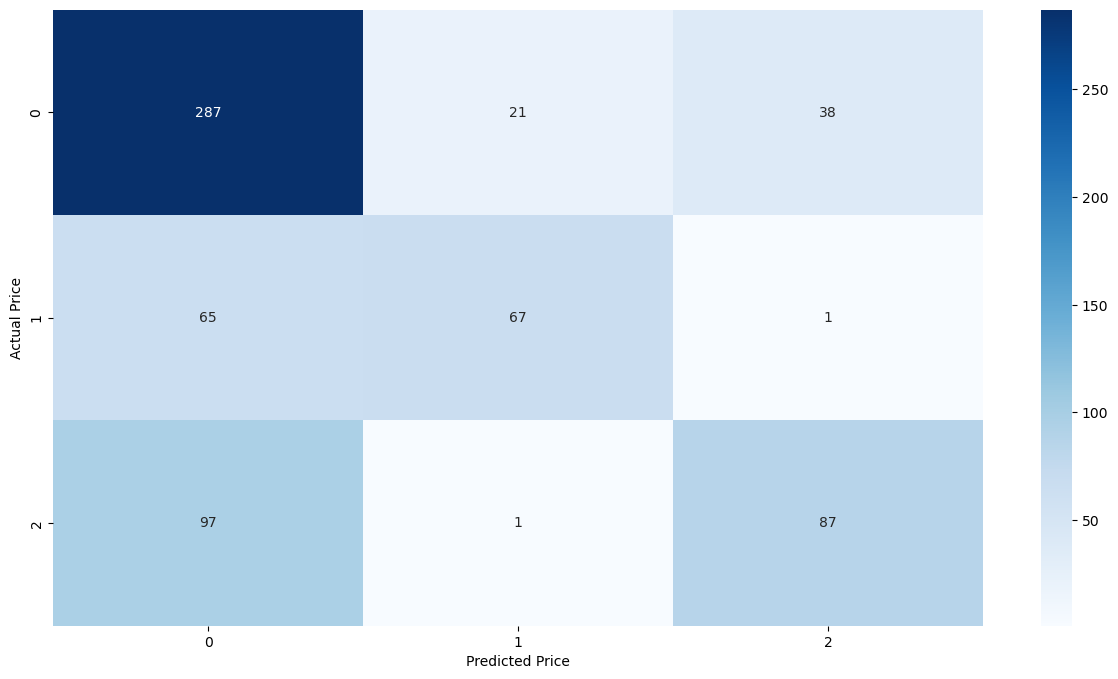

In [58]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [59]:
accuracy_score(y_test, y_pred_lin)

0.6641566265060241

In [72]:
svm_lin = SVC(kernel = "linear", C = 10)

In [61]:
svm_lin.fit(X_train,y_train)

SVC(C=85, kernel='linear')

In [62]:
y_pred_lin1 = svm_lin.predict(X_test)

In [63]:
cm = confusion_matrix(y_test, y_pred_lin1)
cm

array([[285,  16,  45],
       [ 69,  63,   1],
       [ 96,   1,  88]], dtype=int64)

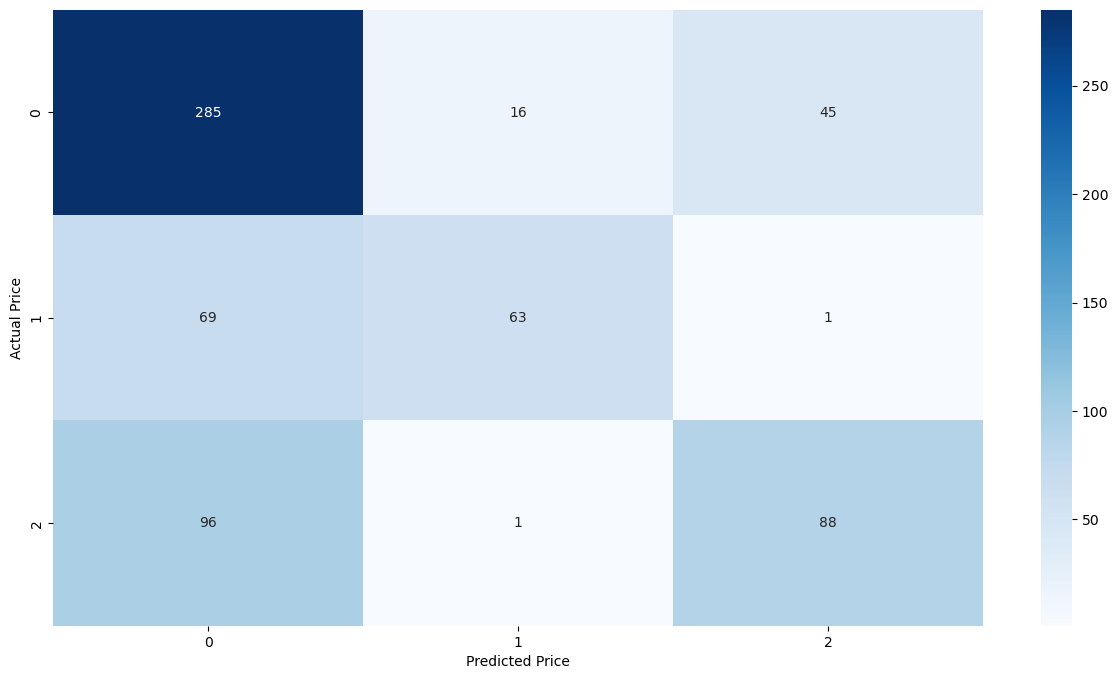

In [64]:
plt.figure(figsize = (15,8))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.show()

In [65]:
accuracy_score(y_test, y_pred_lin)

0.6641566265060241

In [66]:
svm_lin = SVC(kernel = "linear", C = 367)

In [67]:
svm_lin.fit(X_train,y_train)

SVC(C=367, kernel='linear')

In [68]:
y_pred_lin2 = svm_lin.predict(X_test)

In [69]:
cm = confusion_matrix(y_test, y_pred_lin2)
cm

array([[283,  22,  41],
       [ 62,  70,   1],
       [ 93,   2,  90]], dtype=int64)

In [70]:
accuracy_score(y_test, y_pred_lin)

0.6641566265060241

In [73]:
df.to_csv('SVM.csv')

In [74]:
train_df.to_csv('SVM_training.csv')

In [75]:
test_df.to_csv('SVM_test.csv')